In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# seeing our data set
df=pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [4]:
df.shape

(5043, 28)

In [5]:
ndf=df.dropna(axis=0)

In [6]:
ndf.shape

(3756, 28)

Cant remove na values as we lose 25% of the data. Lets try to impute values per column

In [7]:
new_df = df.fillna({'color': 'Color'})
new_df = new_df.fillna({'director_name': 'Blank'})
for i in range(0,len(new_df)):
    new_df["num_critic_for_reviews"].fillna(value=new_df[new_df["director_name"]==new_df['director_name'][0]].num_critic_for_reviews.mean(),inplace=True)
for i in range(0,len(new_df)):
    new_df["duration"].fillna(value=new_df[new_df["director_name"]==new_df['director_name'][0]].duration.mean(),inplace=True)   
for i in range(0,len(new_df)):
    new_df["gross"].fillna(value=new_df[new_df["director_name"]==new_df['director_name'][0]].gross.mean(),inplace=True)   

In [8]:
new_df["director_facebook_likes"].fillna(value=new_df["director_facebook_likes"].mean(),inplace=True)
new_df = new_df.fillna({'actor_3_name': 'Blank'})
new_df = new_df.fillna({'actor_2_name': 'Blank'})
new_df = new_df.fillna({'actor_1_name': 'Blank'})
new_df = new_df.fillna({'actor_1_facebook_likes': 0.00})
new_df = new_df.fillna({'actor_2_facebook_likes': 0.00})
new_df = new_df.fillna({'actor_3_facebook_likes': 0.00})
new_df['facenumber_in_poster'].fillna((new_df['facenumber_in_poster'].mean()), inplace=True)
new_df['num_user_for_reviews'].fillna((new_df['num_user_for_reviews'].mean()), inplace=True)

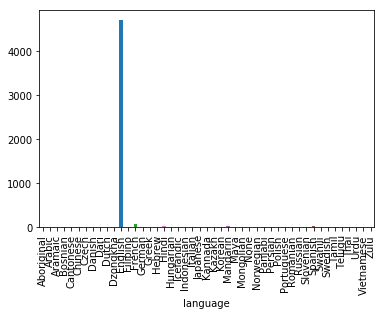

In [9]:
lang =new_df.groupby('language').language.count()
lang.plot.bar()
plt.show()
new_df = new_df.fillna({'language': 'English'})

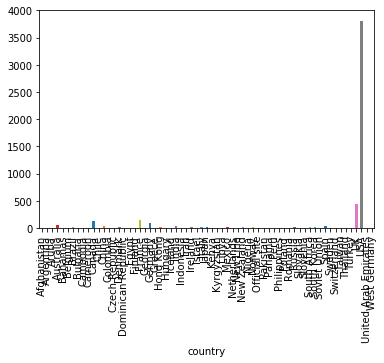

In [10]:
lang =new_df.groupby('country').language.count()
lang.plot.bar()
plt.show()
new_df = new_df.fillna({'country': 'USA'})

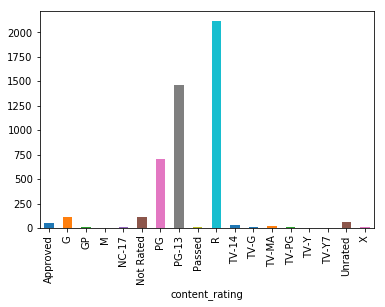

In [11]:
content =new_df.groupby('content_rating').content_rating.count()
content.plot.bar()
plt.show()
new_df = new_df.fillna({'content_rating': 'R'})

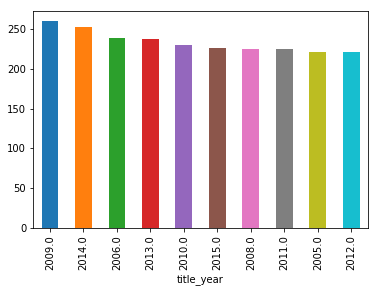

In [12]:
title =new_df.groupby(['title_year']).title_year.count()
title.nlargest(10).plot.bar()

In [13]:
for i in range(0,len(new_df)):
    new_df["num_user_for_reviews"].fillna(value=new_df[new_df["director_name"]==new_df['director_name'][0]].num_user_for_reviews.mean(),inplace=True)   

In [14]:
for i in range(0,len(new_df)):
    new_df["budget"].fillna(value=new_df[new_df["director_name"]==new_df['director_name'][0]].budget.mean(),inplace=True)   

In [15]:
new_df.drop(['plot_keywords','title_year','aspect_ratio'], axis = 1, inplace = True)

In [16]:
new_df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

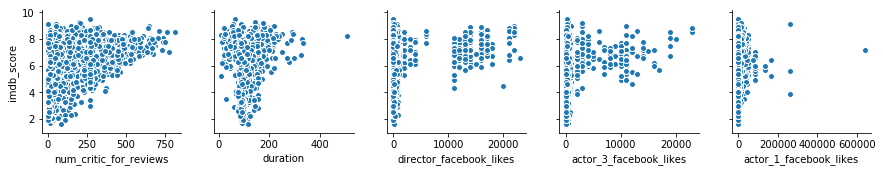

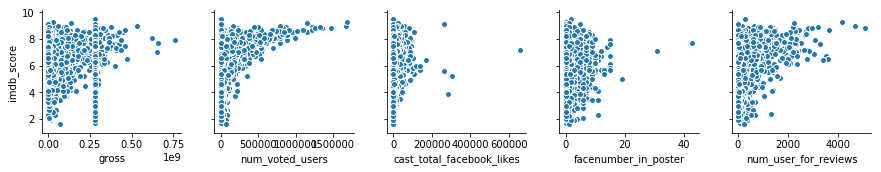

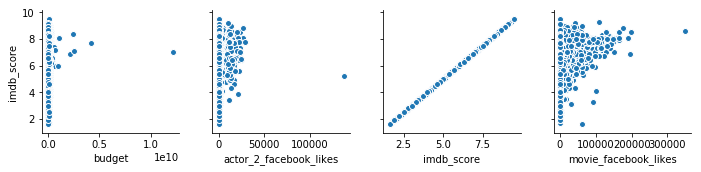

In [17]:
#Code for plotting the graphs.
df_num = new_df.select_dtypes(include = ['float64', 'int64'])
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['imdb_score'])
plt.show()

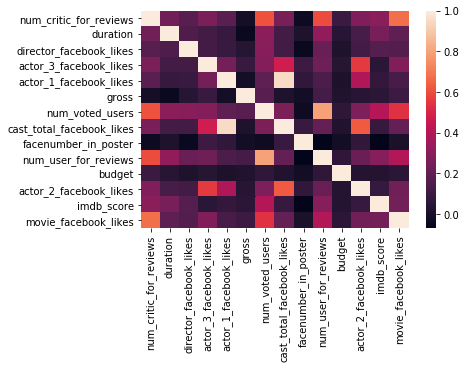

In [18]:
sns.heatmap(new_df.corr())
plt.show()

In [19]:
new_df.drop(['num_user_for_reviews','actor_1_facebook_likes'], axis = 1, inplace = True)

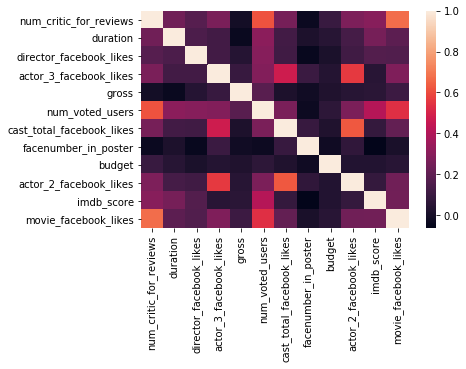

In [20]:
sns.heatmap(new_df.corr())
plt.show()

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 23 columns):
color                        5043 non-null object
director_name                5043 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5043 non-null object
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5043 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5043 non-null object
facenumber_in_poster         5043 non-null float64
movie_imdb_link              5043 non-null object
language                     5043 non-null object
country                      5043 non-n

### Splitting genre into individual itemset

In [22]:
categories = set([s for genre_list in new_df.genres.unique() for s in genre_list.split("|")])

In [23]:
for cat in categories:
    new_df[cat] = new_df.genres.transform(lambda s: int(cat in s))

In [24]:
new_df.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,gross,genres,actor_1_name,...,Western,War,Drama,Musical,Horror,Crime,Documentary,Reality-TV,Adventure,Fantasy
0,Color,James Cameron,723.000000,178.000000,0.0,855.0,Joel David Moore,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,0,0,0,0,0,0,0,0,1,1
1,Color,Gore Verbinski,302.000000,169.000000,563.0,1000.0,Orlando Bloom,3.094042e+08,Action|Adventure|Fantasy,Johnny Depp,...,0,0,0,0,0,0,0,0,1,1
2,Color,Sam Mendes,602.000000,148.000000,0.0,161.0,Rory Kinnear,2.000742e+08,Action|Adventure|Thriller,Christoph Waltz,...,0,0,0,0,0,0,0,0,1,0
3,Color,Christopher Nolan,813.000000,164.000000,22000.0,23000.0,Christian Bale,4.481306e+08,Action|Thriller,Tom Hardy,...,0,0,0,0,0,0,0,0,0,0
4,Color,Doug Walker,268.285714,156.857143,131.0,0.0,Rob Walker,2.783037e+08,Documentary,Doug Walker,...,0,0,0,0,0,0,1,0,0,0
5,Color,Andrew Stanton,462.000000,132.000000,475.0,530.0,Samantha Morton,7.305868e+07,Action|Adventure|Sci-Fi,Daryl Sabara,...,0,0,0,0,0,0,0,0,1,0
6,Color,Sam Raimi,392.000000,156.000000,0.0,4000.0,James Franco,3.365303e+08,Action|Adventure|Romance,J.K. Simmons,...,0,0,0,0,0,0,0,0,1,0
7,Color,Nathan Greno,324.000000,100.000000,15.0,284.0,Donna Murphy,2.008073e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,0,0,0,1,0,0,0,0,1,1
8,Color,Joss Whedon,635.000000,141.000000,0.0,19000.0,Robert Downey Jr.,4.589916e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,...,0,0,0,0,0,0,0,0,1,0
9,Color,David Yates,375.000000,153.000000,282.0,10000.0,Daniel Radcliffe,3.019570e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,0,0,0,0,0,0,0,0,1,1


In [25]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 49 columns):
color                        5043 non-null object
director_name                5043 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5043 non-null object
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5043 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5043 non-null object
facenumber_in_poster         5043 non-null float64
movie_imdb_link              5043 non-null object
language                     5043 non-null object
country                      5043 non-n

### Creating dummy variable

In [26]:
dummies = pd.get_dummies(new_df,columns = ['color','country','content_rating','language'],drop_first = True) 

In [27]:
dummies.drop(['actor_1_name','actor_2_name','actor_3_name','director_name','genres','movie_imdb_link','movie_title'], axis = 1, inplace = True)

In [28]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 166 entries, num_critic_for_reviews to language_Zulu
dtypes: float64(9), int64(29), uint8(128)
memory usage: 2.1 MB


In [29]:
target = dummies['imdb_score']
features=dummies.copy()
features.drop(['imdb_score'], axis = 1, inplace = True)

In [30]:

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20, random_state= 10)


In [31]:


LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_train)

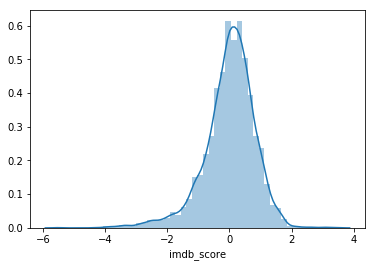

In [32]:
sns.distplot((y_train-pred),bins=50)
plt.show()

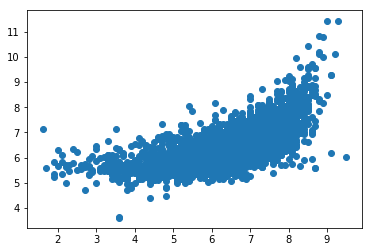

In [33]:
plt.scatter(y_train,pred)
plt.show()

In [34]:
LR.fit(X_test,y_test)
pred_y=LR.predict(X_test)
print("Test MSE for Linear Regression is:",mean_squared_error(y_test, pred_y))
print("Test R square for Linear Regression is:",r2_score(y_test, pred_y))


Test MSE for Linear Regression is: 0.6346338251509969
Test R square for Linear Regression is: 0.5066362987893775


### Implementing Decision Tree to see if we get better accuracy

In [35]:
param_grid = {'max_depth': np.arange(3, 10)}    
tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters Decision Tree: {}".format(grid_search.best_params_))
print("Best cross-validation score Decision Tree: {:.2f}".format(grid_search.best_score_))

Best parameters Decision Tree: {'max_depth': 5}
Best cross-validation score Decision Tree: 0.35


In [36]:
tree = DecisionTreeRegressor(max_depth=7, random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.510
Accuracy on test set: 0.313


### Implementing Random Forest to see if we get better accuracy

In [37]:
param_grid = {"max_depth": np.arange(3, 10),
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10]}

rantree = RandomForestRegressor()
grid_search = GridSearchCV(rantree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.37


In [38]:
forest = RandomForestRegressor(max_depth=9,max_features=10, min_samples_leaf=1, min_samples_split=10, random_state = 2)
forest.fit(X_train, y_train)
print("Accuracy of train set Random Forest: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy of test set Random Forest: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy of train set Random Forest: 0.448
Accuracy of test set Random Forest: 0.344


## Using Tensor Flow

In [39]:
dim = X_train.shape[1]

x = tf.placeholder(dtype=tf.float32,shape=[None, dim],name = "x-input")
y = tf.placeholder(dtype=tf.float32,shape=None,name = "y-input")

In [40]:
# defining parameters

n_neurons_1 = dim
n_neurons_2 = 100
n_neurons_3 = 70
batch_size = 150
epochs = 10
display_step = 100
sigma = 1

In [41]:
# Building hidden layers, defiuning weights and biases

weights = tf.contrib.layers.variance_scaling_initializer(mode='FAN_AVG', uniform=True,seed=None)
biases = tf.zeros_initializer()

hidden_1_layer={'weights':tf.Variable(weights([dim, n_neurons_1])),
                 'biases':tf.Variable(biases([n_neurons_1]))}
hidden_2_layer={'weights':tf.Variable(weights([n_neurons_1,n_neurons_2])),
                 'biases':tf.Variable(biases([n_neurons_2]))}
hidden_3_layer={'weights':tf.Variable(weights([n_neurons_2,n_neurons_3])),
                 'biases':tf.Variable(biases([n_neurons_3]))}

output_layer= {'weights':tf.Variable(weights([n_neurons_3, 1])),
                'biases':tf.Variable(biases([1]))}


l1= tf.nn.relu(tf.add(tf.matmul(x, hidden_1_layer['weights']), hidden_1_layer['biases']))

l2= tf.nn.relu(tf.add(tf.matmul(hidden_1_layer['weights'],hidden_2_layer['weights']), hidden_2_layer['biases']))

l3= tf.nn.relu(tf.add(tf.matmul(hidden_2_layer['weights'],hidden_3_layer['weights']), hidden_3_layer['biases']))

output=tf.add(tf.matmul(l3, output_layer['weights']), output_layer['biases'])

init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [42]:
#Defining cost function and optimizing function

mse = tf.reduce_mean(tf.squared_difference(output, y))
opt = tf.train.GradientDescentOptimizer(0.01).minimize(mse)
init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)

In [43]:
mse_train = []
mse_test = []

mse_train=sess.run(mse, feed_dict={x: X_train, y: y_train})
mse_test=sess.run(mse, feed_dict={x: X_test, y: y_test})

print('Train MSE is: ',mse_train)
print('Test MSE is: ',mse_test)

Train MSE is:  42.372837
Test MSE is:  41.816742
